## Overview
```
Author: Florian Wagner
Email: florian.wagner@duke.edu
```
This notebook extracts GO annotation-based gene sets and then uses them to run GO-PCA on the DMAP data

### Programs and third-party Python packages used

In [1]:
# List versions of programs and third-party Python packges used
from pkg_resources import require

print 'Python:'
!python -V
print

print 'Third-party Python packages:'
print str(require('gopca')[0])
print str(require('genometools')[0])
print str(require('goparser')[0])
print str(require('xlmhg')[0])
print
print str(require('configparser')[0])
print str(require('numpy')[0])
print str(require('scipy')[0])
print str(require('scikit-learn')[0])
print str(require('Cython')[0])
print str(require('matplotlib')[0])

Python:
Python 2.7.9

Third-party Python packages:
gopca 1.1rc13
genometools 1.2rc5
goparser 1.1.3
xlmhg 1.1rc3

configparser 3.3.0.post2
numpy 1.10.1
scipy 0.15.1
scikit-learn 0.16.1
Cython 0.23.4
matplotlib 1.4.3


## Read config file (config.ini)

In [2]:
import codecs
from configparser import ConfigParser

config_file = 'config.ini'

config = ConfigParser()
with codecs.open(config_file, 'rb', encoding = 'UTF-8') as fh:
    config.read_file(fh)
    
config = config['Demo']

### Define gene sets based on GO annotation data

In [3]:
# select annotation with "high-quality" evidence codes
# only keep GO terms that have 5-200 genes annotated with them
min_genes = 5 
max_genes = 200

evidence = ['IDA','IGI','IMP','ISO','ISS','IC','NAS','TAS'] # only include manually curated evidence
ev_str = ' '.join(evidence)

genome_file = config['genome_file']
gene_ontology_file = config['gene_ontology_file']
go_annotation_file = config['go_annotation_file']
go_gene_set_file = config['go_gene_set_file']

!gopca_extract_go_gene_sets.py -g "$genome_file" -t "$gene_ontology_file" -a "$go_annotation_file" \
        -e $ev_str --min-genes-per-term $min_genes --max-genes-per-term $max_genes \
        -o "$go_gene_set_file"

[2016-01-19 18:39:24] INFO: Read 19808 genes.
[2016-01-19 18:39:24] INFO: Parsing gene ontology file...
[2016-01-19 18:39:25] INFO: Parsed 43984 GO term definitions.
[2016-01-19 18:39:25] INFO: Adding child and part relationships...
[2016-01-19 18:39:25] INFO: Flattening ancestors...
[2016-01-19 18:39:32] INFO: Flattening descendants...
[2016-01-19 18:39:41] INFO: Parsing GO annotation file...
[2016-01-19 18:39:41] INFO: Read 19808 genes.
[2016-01-19 18:39:41] INFO: Parsing annotations...
[2016-01-19 18:39:49] INFO: Parsed 479804 positive GO annotations (253398 = 52.8% excluded based on evidence type).
[2016-01-19 18:39:49] WARNING: Warning: 7425 annotations with 355 unkonwn gene names.
[2016-01-19 18:39:49] INFO: Found a total of 218981 valid annotations.
[2016-01-19 18:39:49] INFO: 142982 unique Gene-Term associations.
[2016-01-19 18:39:49] INFO: Obtaining GO term associations...
[2016-01-19 18:39:53] INFO: # terms selected intially: 7478
[2016-01-19 18:39:53] INFO: # terms with redu

###  Run GO-PCA using GO annotation-based gene sets
We run GO-PCA from the command line, using the script `go-pca.py`. The results are stored in Python `pickle` format, and will be examined in subsequent steps.

In [4]:
# run GO-PCA
mapped_expression_file = config['mapped_expression_file']
gene_ontology_file = config['gene_ontology_file']
go_gene_set_file = config['go_gene_set_file']
gopca_file = config['gopca_file']

L = 1000
seed = 123456789

!go-pca.py -L $L -e "$mapped_expression_file" -t "$gene_ontology_file" -s "$go_gene_set_file" \
        -ps $seed -o "$gopca_file"

[2016-01-19 18:39:55] INFO: Timestamp: 2016-01-19 23:39:55.025232
[2016-01-19 18:39:55] INFO: Reading expression data...
[2016-01-19 18:39:55] INFO: Expression file hash: 1ed86d7acaad83802c6165401b170aea
[2016-01-19 18:39:59] INFO: Expression matrix size: (p = 8547 genes) x (n = 211 samples).
[2016-01-19 18:39:59] INFO: Reading gene ontology...
[2016-01-19 18:39:59] INFO: Gene ontology file hash: de976cab6d1e86ac6a49e90fb2535d0f
[2016-01-19 18:40:16] INFO: Reading gene sets...
[2016-01-19 18:40:16] INFO: Gene set file hash: 7e7ab213e624d133939b2d78943d0dd1
[2016-01-19 18:40:16] INFO: Estimating the number of principal components (seed = 123456789)...
[2016-01-19 18:40:33] INFO: The estimated number of PCs is 14.
[2016-01-19 18:40:33] INFO: Generating gene x GO term matrix...
[2016-01-19 18:40:34] INFO: Performing PCA...
[2016-01-19 18:40:35] INFO: Cumulative fraction of variance explained by the first 14 PCs: 79.8%
[2016-01-19 18:40:35] INFO: 
[2016-01-19 18:40:35] INFO: --------------

## Examine GO-PCA results

### Print information about GO-PCA output

In [5]:
!gopca_print_info.py -g $gopca_file

GO-PCA Run
----------
- GO-PCA version: 1.1rc13
- Timestamp: 2016-01-19 23:39:55.025232
- Exec. time: 59.8 s

GO-PCA Result
-------------
- Config MD5 hash: cbf5023abb14d8f63f6dac1b2689945d
- Result MD5 hash: e71521a0ddb901a9787c6e3eb9549b1e
- Expression data: 8547 genes, 211 samples
- Number of PCs tested: 14
- Number of signatures generated: 42
- Config data:
    escore_pval_thresh=0.0001
    escore_thresh=2.0
    expression_file=./output/dmap_expression_mapped.tsv
    expression_file_hash=1ed86d7acaad83802c6165401b170aea
    gene_ontology_file=./data/go-basic.obo
    gene_ontology_file_hash=de976cab6d1e86ac6a49e90fb2535d0f
    gene_set_file=./output/go_gene_sets_human.tsv
    gene_set_file_hash=7e7ab213e624d133939b2d78943d0dd1
    go_part_of_cc_only=False
    mHG_L=1000
    mHG_X_frac=0.25
    mHG_X_min=5
    n_components=14
    no_global_filter=False
    no_local_filter=False
    output_file=./output/dmap_gopca.pickle
    pc_max=0
    pc_permutations=15
    pc_seed=123456789
    pc

### Save signatures to a tab-delimited text file

In [6]:
!gopca_extract_signatures.py -g "{config['gopca_file']}" -o "{config['gopca_signature_file']}"

[2016-01-19 18:40:56] INFO: Wrote 42 signatures to "./output/dmap_gopca_signatures.tsv".


### Save signatures to an Excel spreadsheet

In [7]:
!gopca_extract_signatures_excel.py -g "{config['gopca_file']}" -o "{config['gopca_signature_excel_file']}"

[2016-01-19 18:40:57] INFO: Wrote 42 signatures to "./output/dmap_gopca_signatures.xlsx".


### Save the signature matrix to a tab-delimited text file

In [8]:
!gopca_extract_signature_matrix.py -g "{config['gopca_file']}" -o "{config['gopca_signature_excel_file']}"

[2016-01-19 18:40:58] INFO: Wrote matrix with 42 signatures and 211 samples to "./output/dmap_gopca_signatures.xlsx".


### Plot the signature matrix

[2016-01-19 18:40:58] INFO: Clustering of samples...
[2016-01-19 18:40:58] INFO: Plotting...
[2016-01-19 18:40:59] INFO: Saving to file...
/datapool001/fw36/Dropbox/sandbox/env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
[2016-01-19 18:41:02] INFO: Done!


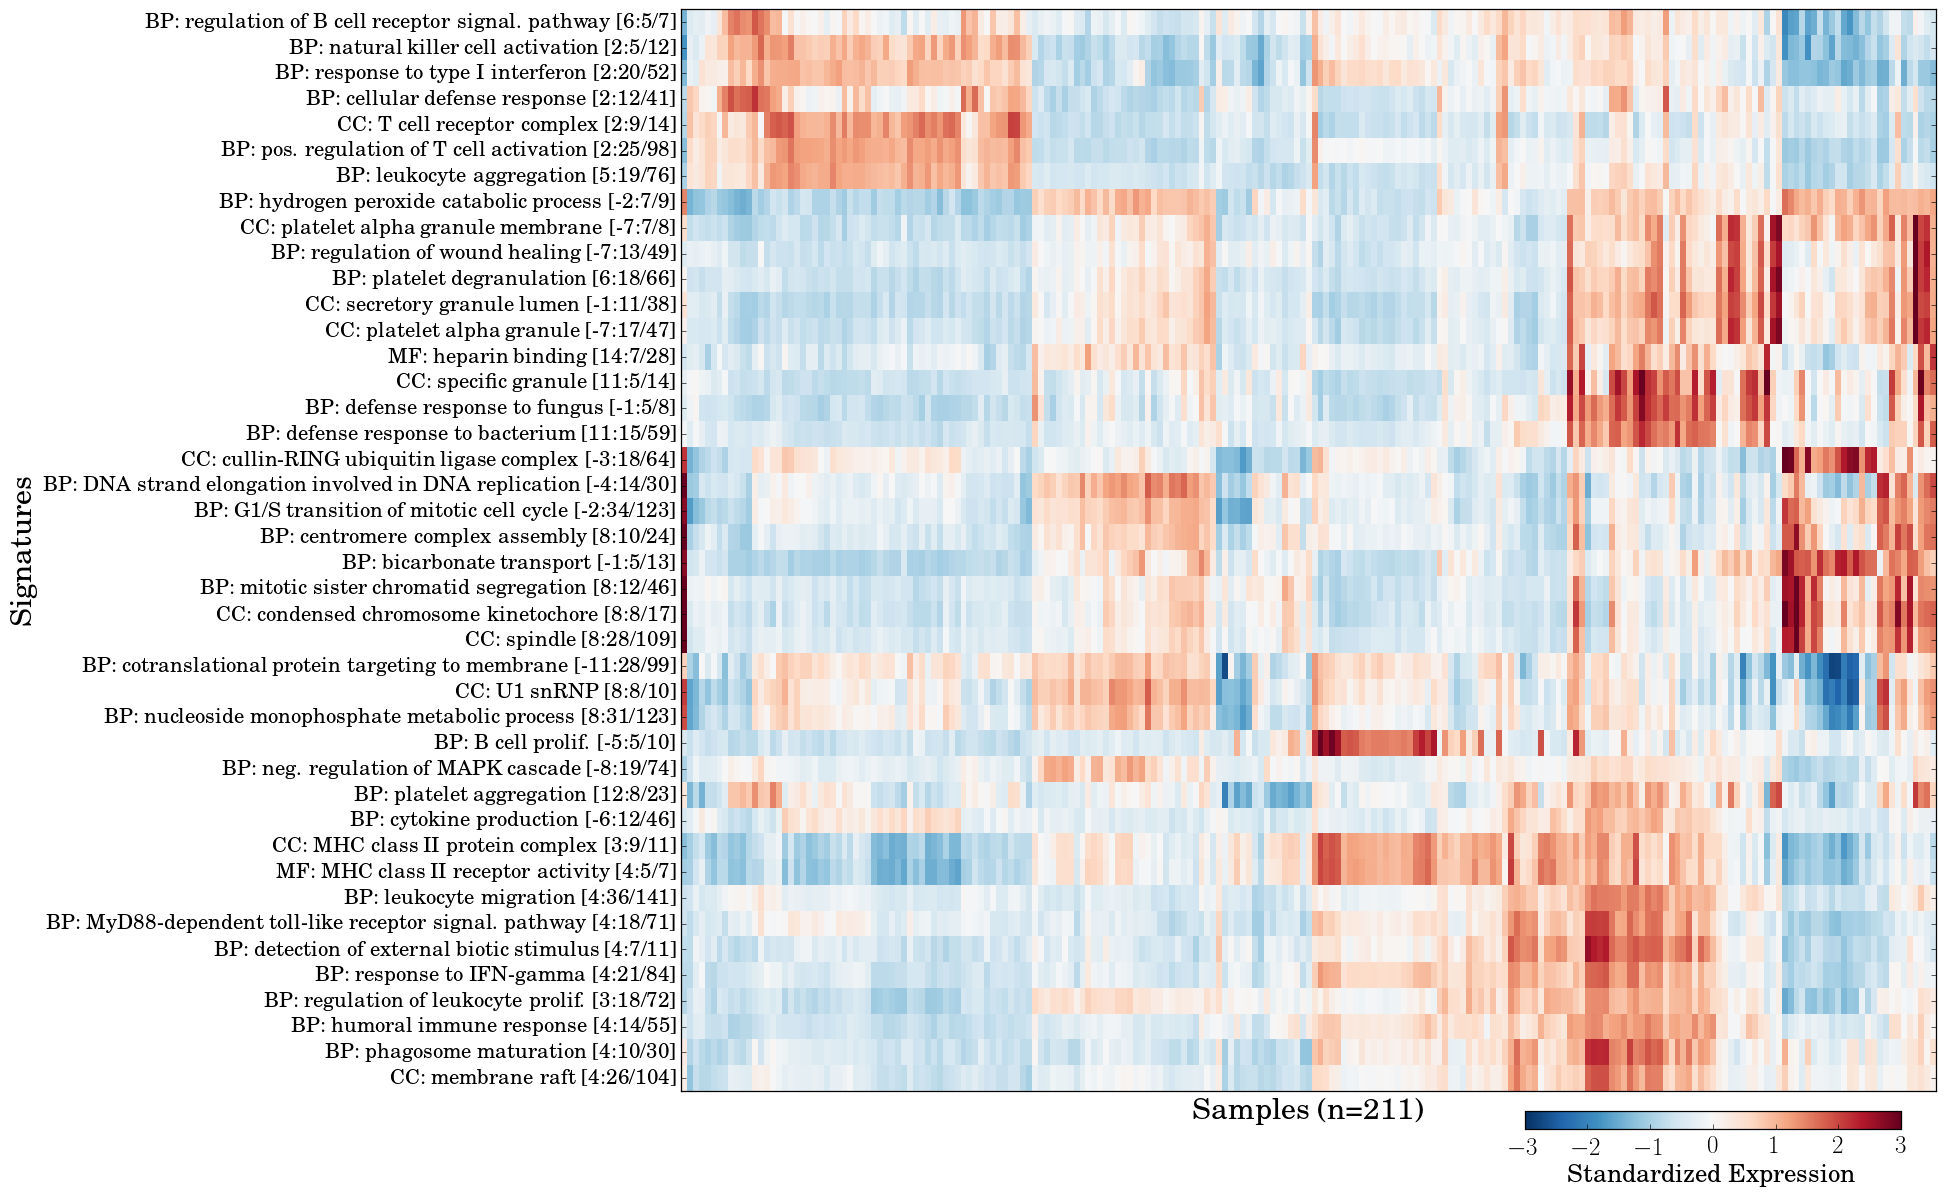

In [9]:
from IPython.display import Image

dpi = 90.0

!gopca_plot_signature_matrix.py -g "{config['gopca_file']}" -r $dpi -t \
        --sample-cluster-metric euclidean -o "{config['gopca_signature_matrix_plot']}"
Image(filename = config['gopca_signature_matrix_plot'], width = 800)

### Plot the "DNA strand elongation..." signature in detail

[2016-01-19 18:41:03] INFO: Plotting...
[2016-01-19 18:41:03] INFO: Saving to file...
/datapool001/fw36/Dropbox/sandbox/env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
[2016-01-19 18:41:04] INFO: Done!


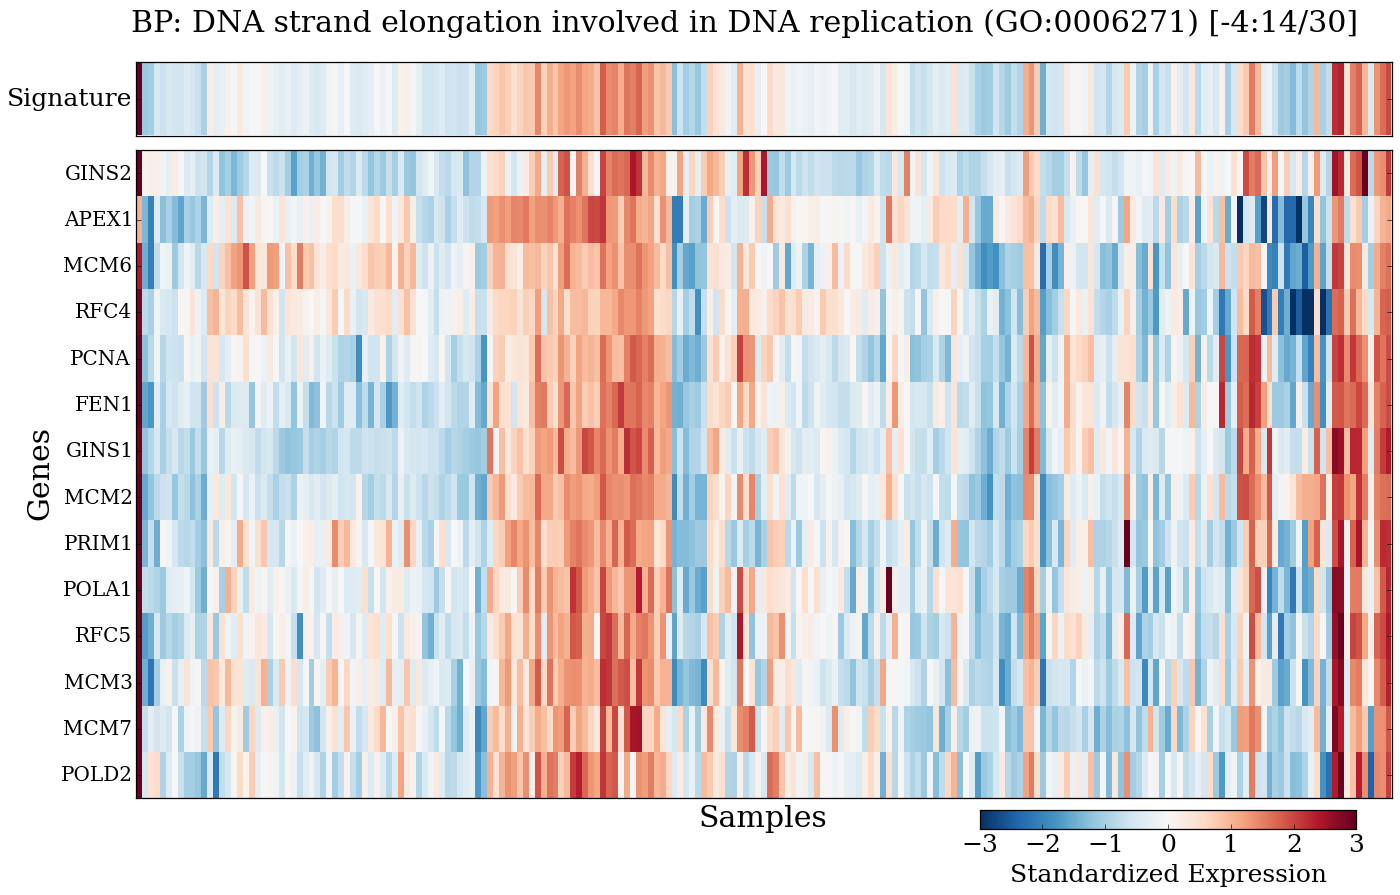

In [10]:
#plot the "DNA replication" signature in detail
from IPython.display import Image

dpi = 90
!gopca_plot_signature.py -g "{config['gopca_file']}" -n "DNA strand" -r $dpi -s 18 12 \
        --gene-label-size 16 --sample-cluster-metric euclidean \
        -o "{config['gopca_signature_plot']}" 
Image(filename = config['gopca_signature_plot'], width = 800)

## Copyright and License

Copyright (c) 2016 Florian Wagner.

This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).